Based on :
https://github.com/conorosully/medium-articles/blob/master/src/shap_interaction.ipynb

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import  datasets
 
import xgboost as xgb

import shap


/Users/fernandesm/opt/anaconda3/envs/shap/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#import dataset
data = pd.read_csv('datasets/iris_flowers.csv', delimiter = ';')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [4]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
 petal_width    float64
class            object
dtype: object

In [5]:
y = data['class']
X = data.drop(['class'], axis=1)

print(len(data))
X.head()

150


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y

0         iris_setosa
1         iris_setosa
2         iris_setosa
3         iris_setosa
4         iris_setosa
            ...      
145    iris_virginica
146    iris_virginica
147    iris_virginica
148    iris_virginica
149    iris_virginica
Name: class, Length: 150, dtype: object

In [17]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror",max_depth=3) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


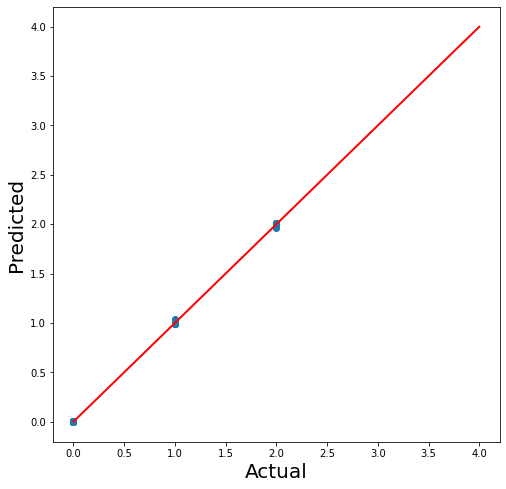

In [23]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 4], [0, 4], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.savefig(('regression_evaluation.png'),dpi=200,bbox_inches='tight')

In [24]:
#Get SHAP interaction values
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [25]:
#Get shape of interaction values
print(np.shape(shap_interaction))

# SHAP interaction values for first employee
pd.DataFrame(shap_interaction[0],index=X.columns,columns=X.columns)

(150, 4, 4)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.003414,-0.009672,-0.003664,-0.000511
sepal_width,-0.009672,-0.051559,0.004980,0.023288
petal_length,-0.003664,0.004980,-0.903214,0.067392
petal_width,-0.000511,0.023288,0.067392,-0.212097


In [26]:
#Get model predictions
y_pred = model.predict(X)

#Calculate mean prediction 
mean_pred = np.mean(y_pred)

#Sum of interaction values for first employee
sum_shap = np.sum(shap_interaction[0])

print("Model prediction: {}".format(y_pred[0]))
print("Mean prediction + interaction values: {}".format(mean_pred+sum_shap))

print(mean_pred, sum_shap)

Model prediction: 0.00014524394646286964
Mean prediction + interaction values: 0.00014519691467285156
0.9999758 -0.9998306


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


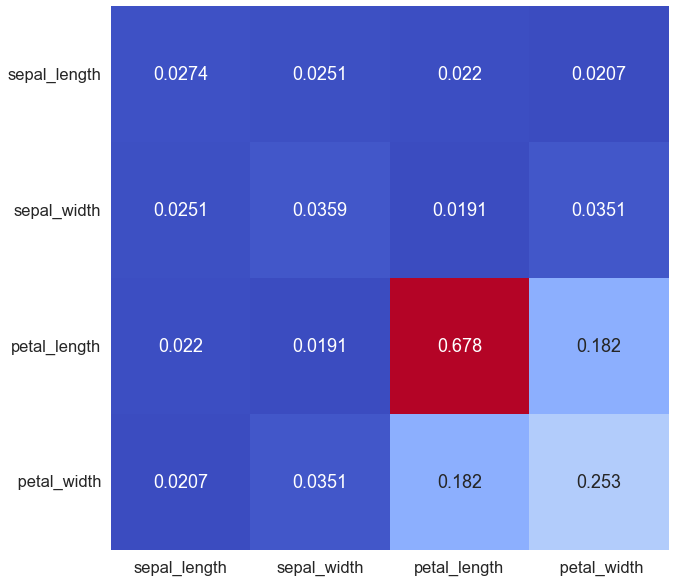

In [28]:
# Get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 

plt.savefig(('abs_mean_shap.png'),dpi=200,bbox_inches='tight')

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


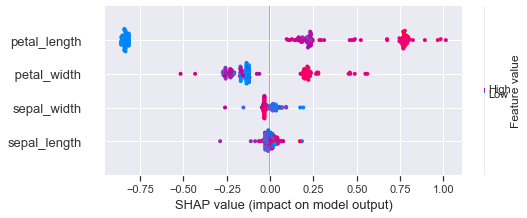

In [29]:
# Get SHAP values
shap_values = explainer(X)

#Display beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

plt.savefig(('beeswarm.png'),dpi=200,bbox_inches='tight')

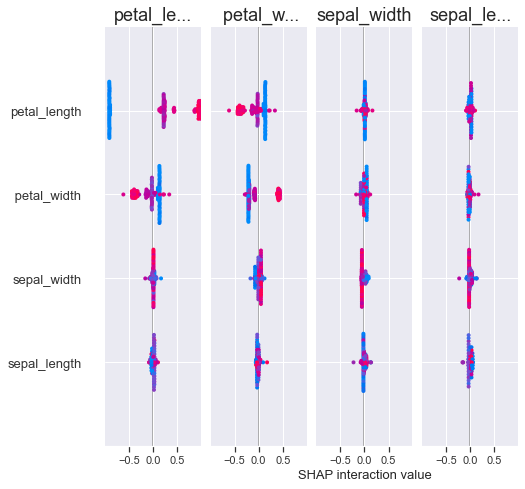

In [30]:
#Display summary plot
shap.summary_plot(shap_interaction, X,show=False)

plt.savefig(('summary.png'),dpi=200,bbox_inches='tight')

In [33]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


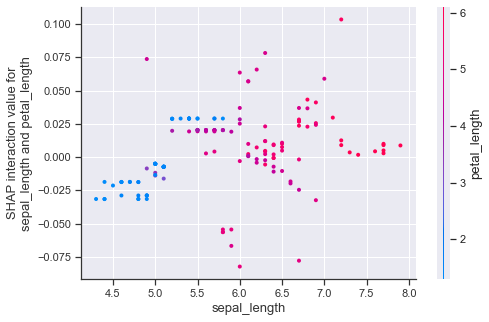

In [35]:
# Sepal_length-petal_length dependence plot
shap.dependence_plot(
    ("sepal_length", "petal_length"),
    shap_interaction, X,
    display_features=X,show=False)

plt.savefig(('exp_degree_dependence.png'),dpi=200,bbox_inches='tight')